Welcome to the notebook. This notebook is just a Figure Creator. Nothing special. 

The magic line of code is `plt.savefig("myImagePDF.pdf", format="pdf", bbox_inches="tight")`, which actulaly generates the image. Unfortunately we have some somewhat complicated images to make, so let's hop to it.

First, how about a lambertian/specular demonstration? As a bit of an example.

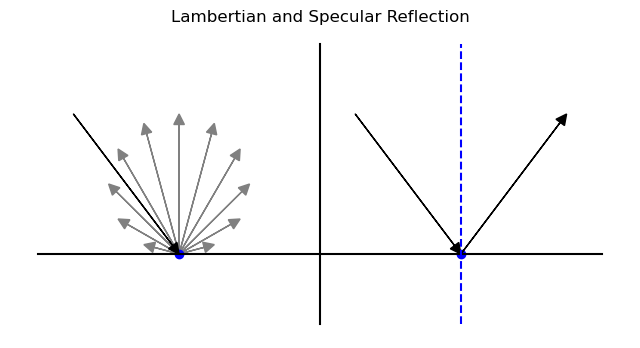

In [52]:
import matplotlib.pyplot as plt
import numpy as np

floor1 = np.array([0,8])
floor2 = np.array([1,1])
divide1 = np.array([4,4])
divide2 = np.array([0,4])

fig, ax = plt.subplots(figsize = (8,4))

ax.plot(floor1,floor2,divide1,divide2,color='k')
ax.scatter([2,6],[1,1],color='blue')

#draw the main arrows.
ax.arrow(0.5,3,1.5,-2,head_width=0.15,head_length=0.15,length_includes_head=True, color='k',zorder=1)
ax.arrow(4.5,3,1.5,-2,head_width=0.15,head_length=0.15,length_includes_head=True, color='k',zorder=1)
ax.arrow(6,1,1.5,2,head_width=0.15,head_length=0.15,length_includes_head=True, color='k',zorder=1)

#reflection line for specular
ax.plot([6,6],[0,4],linestyle='dashed',color="blue")

#now the harder part: the lambertian arrows. 
#for some reason ax can't do this, there is no ax.circle function. So instead we have to create an artist 
#and patch it in.
#circle = plt.Circle((2,2),1,color='r',zorder=0)
#ax.add_patch(circle)
#Circle removed as it was cluttery, but it was a good guide for making the arrows.

#This should be able to be done algorithmically: adjust the dx and dy values for arrow
#have it sweep across the angles and fill the circle. 
radc = 0.0174533 #for conversion into radians when needed.
theta = 15.0 #Think in degrees, calculate in radians.
while (theta < 90):
    L = 1.0 * (np.sin((180. - 2.*theta)*radc) / np.sin(theta*radc))
    dx = L*np.cos((90.-theta)*radc)
    dy = L*np.sin((90.-theta)*radc)
    ax.arrow(2,1,dx,dy,head_width=0.15,head_length=0.15,length_includes_head=True, color='gray',zorder=0)
    ax.arrow(2,1,-dx,dy,head_width=0.15,head_length=0.15,length_includes_head=True, color='gray',zorder=0)
    theta = theta + 15.
#The 90 degree case still needs to be handled.
ax.arrow(2,1,0,2,head_width=0.15,head_length=0.15,length_includes_head=True, color='gray',zorder=0)


ax.axis('off') #remove border and ticks. 
ax.set(title = "Lambertian and Specular Reflection")

#The save-as-pdf function.
plt.savefig("LambertSpec.pdf", format="pdf")

plt.show()


Up next: a diagram showcasing a scattering event in SRTC++ with Lambertian Reflection.

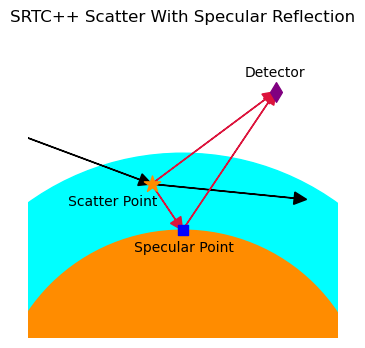

In [129]:
import matplotlib.pyplot as plt
import numpy as np
fig, ax = plt.subplots(figsize = (4,4))

#First, we need to create Titan and Titan's Atmosphere.
#This will involve circles. 
atmo = plt.Circle((0.5,-0.25),0.85,color="cyan")
titan = plt.Circle((0.5,-0.25),0.6,color="darkorange")
ax.add_patch(atmo)
ax.add_patch(titan)

#While it doesn't make logical sense to add the arrows first, we need them under the points
#So deal with it.
ax.arrow(0,0.65,0.4,-0.15,head_width=0.04,head_length=0.04,length_includes_head=True, color='k')
ax.arrow(0.4,0.5,0.1,-0.15,head_width=0.04,head_length=0.04,length_includes_head=True, color='crimson')
ax.arrow(0.4,0.5,0.4,0.3,head_width=0.04,head_length=0.04,length_includes_head=True, color='crimson')
ax.arrow(0.4,0.5,0.5,-.05,head_width=0.04,head_length=0.04,length_includes_head=True, color='k')
ax.arrow(0.5,0.35,0.3,0.45,head_width=0.04,head_length=0.04,length_includes_head=True, color='crimson')

#add various points we need: specular point, scatter point, and detector.
ax.scatter(0.5,0.35,marker="s",color="blue",s=50)
ax.scatter(0.4,0.5,marker="*", color="darkorange",s=150)
ax.scatter(0.8,0.8,marker="d",color="purple",s=100)

#Now some labels might be helpful
ax.text(0.3,0.28, "   Specular Point")
ax.text(0.09,0.43, "   Scatter Point")
ax.text(0.7,0.85, "Detector")

ax.axis('off') #remove border and ticks. 
ax.set(title = "SRTC++ Scatter With Specular Reflection") 
ax.set_ylim([0,1])
ax.set_xlim([0,1])


#The save-as-pdf function.
plt.savefig("SRTCSpec.pdf", format="pdf")

plt.show()

Figure 3 had to be created in the VIMS Cube Visual Interface notebook in Scratch Work, as it required the backend to read VIMS images to construct.